In [6]:
import numpy as np
import matplotlib.pyplot as plt

import pic.integrator as int

In [7]:
dt = 1e-2;
mass = m = 1.;
charge = q = 1.;
vAc = 3e-4;

duration = 100000;

### B and E Field Configurations

In [8]:
def B_update(x):
    return np.array([0., 0., np.sqrt(x[0]**2 + x[1]**2)]);

def E_update(x):
    return np.array([x[0], x[1], 0])/np.sqrt(x[0]**2 + x[1]**2)*1e-2;

### Runga Kutta 4th Order

In [9]:
v = np.array([0., 1., 0.]);
x = np.array([-1., 0., 0.]);

X = np.zeros((duration,3)) 
V = np.zeros((duration,3))

In [10]:
for i in range(duration):
    X[i] = x
    V[i] = v
    x, v = int.rk4(x, v, lambda x, v: q/m * (E_update(x) + np.cross(v, B_update(x))), dt)

TypeError: <lambda>() missing 1 required positional argument: 'v'

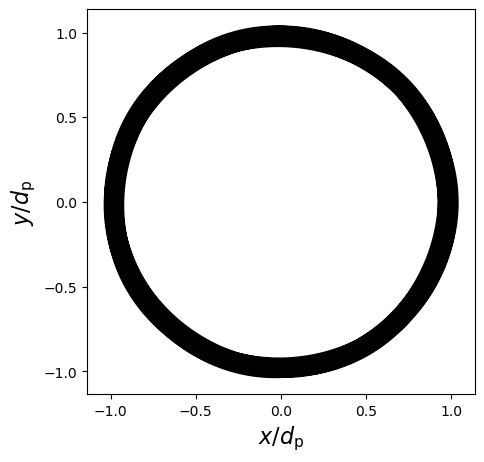

In [83]:
plt.figure(figsize=(5,5))

plt.plot(X[:,0],X[:,1],'k',linewidth=2.0); 
plt.xlabel(r'$x/d_{\rm p}$',fontsize=16)
plt.ylabel(r'$y/d_{\rm p}$',fontsize=16)

plt.show()

### Tajima Implicit
https://www.particleincell.com/2011/vxb-rotation/

In [89]:
v = np.array([0., 1., 0.]);
x = np.array([-1., 0., 0.]);

X = np.zeros((duration,3)) 
V = np.zeros((duration,3))

In [91]:
for time in range(duration):
    X[time] = x
    V[time] = v
    x, v = int.tajima_implicit(x, v, E_update(x), B_update(x), q, m, dt)

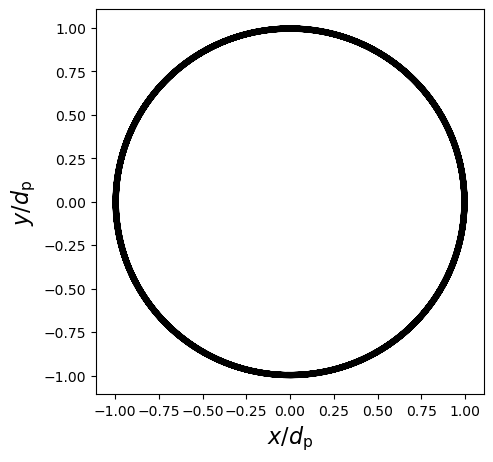

In [92]:
plt.figure(figsize=(5,5))

plt.plot(X[:,0],X[:,1],'k',linewidth=2.0); 
plt.xlabel(r'$x/d_{\rm p}$',fontsize=16)
plt.ylabel(r'$y/d_{\rm p}$',fontsize=16)

plt.show()

### Vay
https://iopscience.iop.org/article/10.3847/1538-4365/aab114/pdf

### Higuera-Cary
https://iopscience.iop.org/article/10.3847/1538-4365/aab114/pdf

### Implicit Midpoint
https://iopscience.iop.org/article/10.3847/1538-4365/aab114/pdf

### BGSDC
https://www.sciencedirect.com/science/article/pii/S2590055219300526</br>
https://ars.els-cdn.com/content/image/1-s2.0-S2590055219300526-gr001.gif

### Analytical Boris
Literally the best Boris
https://www.sciencedirect.com/science/article/pii/S0010465522002788#se0050

In [ ]:
u0 = v
c = 3e8
omega = q*B/m/c
o_mag = np.linalg.norm(omega)
o_norm = omega/o_mag
E_para = np.dot(E, o_norm)*o_norm
E_perp = E - E_para

In [ ]:
g_ave = 1 # TODO replace with tau value in 3.2

In [ ]:
u1p = u0 + q/m*E_para*dt/2 + q*g_ave/m/o_mag*E_perp*np.tan(o_mag*dt/2/g_ave)
u2p = u1p*np.cos(o_mag*dt/2) + u1p@omega/o_mag*np.sin(o_mag*dt/g_ave) + (1-np.cos(o_mag*dt/g_ave))*(np.dot(u1p, omega)*omega/o_mag**2)
u = u2p + q/m*E_para*dt/2 + q*g_ave/m/omega*E_perp*np.tan(o_mag*dt/2/g_ave)